In [63]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [87]:
in_features = 2
n_fourier_features = 256
n_layers = 4
units_layer = [256, 256, 256, 256]

image_shape = (256, 256, 3)

In [88]:
def make_coordiante(shape):
    x_coordinates = np.linspace(-1, +1, shape[0])
    y_coordinates = np.linspace(-1, +1, shape[1])
    x_coordinates, y_coordinates = np.meshgrid(x_coordinates, y_coordinates)
    x_coordinates = x_coordinates.flatten()
    y_coordinates = y_coordinates.flatten()
    Coordinates = np.stack([x_coordinates, y_coordinates]).T
    return Coordinates

Coordinate = make_coordiante(image_shape)

Text(0.5, 1.0, 'input distribution')

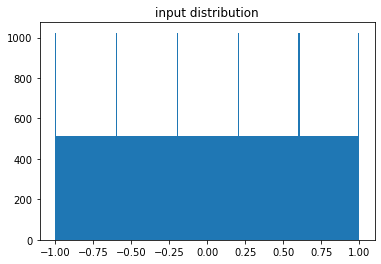

In [89]:
## input distribution
plt.figure()
_ = plt.hist(Coordinate.flatten(), 250)
plt.title("input distribution")

In [321]:
dist_config = {
    "dist" : "normal",
    "mean" : 0,
    "std" : 1,
}

In [322]:
class FourierLayer:
    def __init__(self,
                 in_features,
                 n_fourier_features, 
                 dist_config):
        self.in_features = in_features
        self.n_fourier_features = n_fourier_features
        self.dist_config = dist_config
        
        self.init_weight()
    
    def init_weight(self):
        if self.dist_config["dist"] == "normal":
            self.B = dist_config["std"] * \
                     np.random.randn(self.in_features, self.n_fourier_features) + \
                     dist_config["mean"]
        elif self.dist_config["dist"] == "uniform":
            self.B = (dist_config["interval"][1] - dist_config["interval"][0]) * \
                      np.random.rand(self.in_features, self.n_fourier_features) + \
                      dist_config["interval"][0]
        self.a1 = 1 + 0 * np.random.randn()
        self.w1 = 1/(2*math.pi) + 0 * np.random.randn()
        #self.w1 = np.random.randn()
        self.phase1 = 0 * np.random.randn()
        
        self.a2 = 1 + 0 * np.random.randn()
        self.w2 = 1/(2*math.pi) + 0 * np.random.randn()
        #self.w2 = np.random.randn()
        self.phase2 = 0 * np.random.randn()
    
    def __call__(self, x):
        self.before_activation = x @ self.B
        return np.concatenate([self.a1 * np.sin(self.w1 * 2 * math.pi * self.before_activation + self.phase1),
                               self.a2 * np.cos(self.w2 * 2 * math.pi * self.before_activation + self.phase2)], axis=-1)

In [323]:
fourier_layer = FourierLayer(in_features,
                             n_fourier_features,
                             dist_config)

Text(0.5, 1.0, 'B distribution')

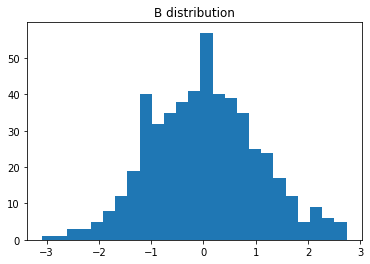

In [324]:
## B distribution
plt.figure()
_ = plt.hist(fourier_layer.B.flatten(), 25)
plt.title("B distribution")

Text(0.5, 1.0, 'After Activation Fourier Features distribution')

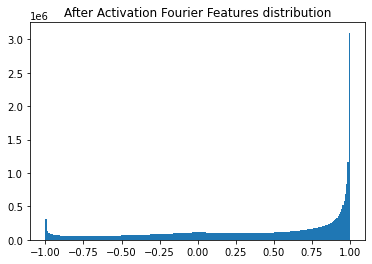

In [335]:
## After Activation Fourier Features distribution
plt.figure()
fourier_layer_result = fourier_layer(Coordinate)
_ = plt.hist(fourier_layer_result.flatten(), 250)
plt.title("After Activation Fourier Features distribution")

Text(0.5, 1.0, 'Before Activation Fourier Features distribution')

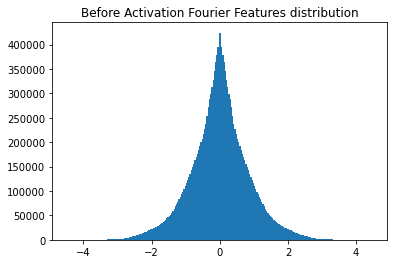

In [326]:
## Before Activation Fourier Features distribution
plt.figure()
_ = plt.hist(fourier_layer.before_activation.flatten(), 250)
plt.title("Before Activation Fourier Features distribution")

Text(0.5, 1.0, 'After sine distribution')

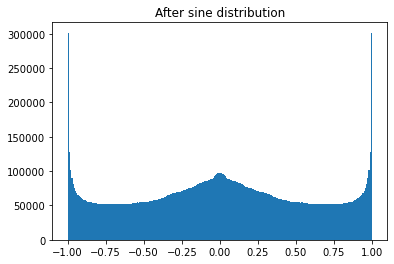

In [344]:
## After sine distribution
plt.figure()
_ = plt.hist(np.sin(fourier_layer.before_activation).flatten(), 250)
plt.title("After sine distribution")

In [328]:
dist_config = {
    "dist" : "normal",
    "mean" : 0,
    "std" : 1,
}

In [366]:
class ParamLayer:
    def __init__(self,
                 in_features,
                 units, 
                 dist_config):
        self.in_features = in_features
        self.units = units
        self.dist_config = dist_config
        
        self.init_weight()
    
    def init_weight(self):
        if self.dist_config["dist"] == "normal":
            self.kernel = dist_config["std"] * \
                          np.random.randn(self.in_features, self.units) + \
                          dist_config["mean"]
        elif self.dist_config["dist"] == "uniform":
            self.kernel = (dist_config["interval"][1] - dist_config["interval"][0]) * \
                           np.random.rand(self.in_features, self.units) + \
                           dist_config["interval"][0]
        self.a1 = 1 + 0 * np.random.randn()
        self.w1 = 1/(2*math.pi) + 0 * np.random.randn()
        #self.w1 = np.random.randn()
        self.phase1 = 0 * np.random.randn()
        
        self.a2 = 1 + 0 * np.random.randn()
        self.w2 = 1/(2*math.pi) + 0 * np.random.randn()
        #self.w2 = np.random.randn()
        self.phase2 = 0 * np.random.randn()
    
    def __call__(self, x):
        self.before_activation = x @ self.kernel
        return self.a1 * np.sin(self.w1 * 2 * math.pi * self.before_activation + self.phase1) + \
               self.a2 * np.cos(self.w2 * 2 * math.pi * self.before_activation + self.phase2)

In [367]:
param1_layer = ParamLayer(2 * n_fourier_features,
                          units_layer[0],
                          dist_config)

Text(0.5, 1.0, 'kernel1 distribution')

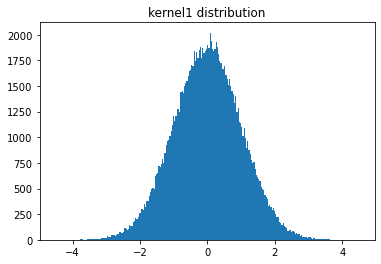

In [368]:
## kernel1 distribution
plt.figure()
_ = plt.hist(param1_layer.kernel.flatten(), 250)
plt.title("kernel1 distribution")

Text(0.5, 1.0, 'After Activation Param Layer1 distribution')

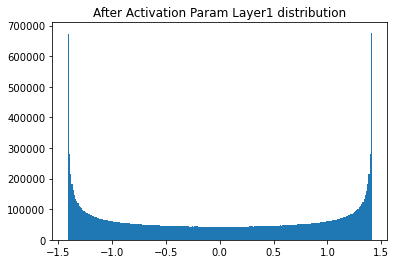

In [369]:
## After Activation Param Layer 1 distribution
plt.figure()
_ = plt.hist(param1_layer(fourier_layer_result).flatten(), 250)
plt.title("After Activation Param Layer1 distribution")

Text(0.5, 1.0, 'Before Activation Param Layer1 distribution')

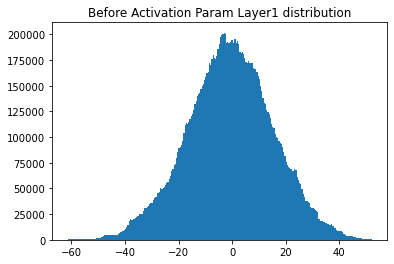

In [370]:
## Before Activation Param Layer 1 distribution
plt.figure()
_ = plt.hist(param1_layer.before_activation.flatten(), 250)
plt.title("Before Activation Param Layer1 distribution")